# Laboratorio: Il frattale di Mandelbrot

In questo laboratorio vedremo come sia possibile visualizzare il celebre **Frattale di Mandelbrot** rappresentato nella figura sotto.

<div style="text-align: center;">

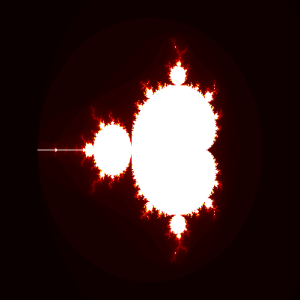

</div>


Questa figura si ottiene colorando sul piano i punti che appartengono (o non appartengono) all'**insieme di Mandelbrot**.

L'insieme di Mandelbrot è composto da tutti i numeri complessi c per cui una particolare successione rimane limitata.
In particolare, per ogni numero complesso c = X + iY (dove X e Y sono le coordinate sul piano), definiamo la successione:

z₀ = 0

z_{n+1} = z_n² + c

Scritta in termini di coordinate reali (x_n, y_n), dove z_n = x_n + iy_n, la successione diventa:

x_{n+1} = x_n² - y_n² + X

y_{n+1} = 2 x_n y_n + Y

con (X, Y) il punto di cui vogliamo testare l'appartenenza all'insieme e (x₀, y₀) = (0, 0).

Un punto c = (X, Y) appartiene all'insieme di Mandelbrot se la successione che parte da z₀ = 0 rimane **limitata**, cioè i punti della successione restano sempre all'interno di una regione finita del piano. Al contrario, se la successione si allontana indefinitamente dall'origine, il punto c non appartiene all'insieme.



## Implementazione pratica

Poiché non possiamo calcolare infiniti termini della successione, useremo un criterio pratico: un punto viene considerato **nell'insieme di Mandelbrot** se dopo n iterazioni (ad esempio 100) la distanza dall'origine sqrt(x_n² + y_n²) non ha mai superato il valore 2.

Si può dimostrare matematicamente che se la distanza supera 2, la successione divergerà sicuramente all'infinito.

---

**Nota**: Per creare l'effetto visivo del frattale, coloreremo i punti in base al numero di iterazioni necessarie prima che la distanza superi 2. Questo creerà le sfumature caratteristiche che rendono il frattale così affascinante!

### Passo 1: Verificare se un punto (X, Y) appartiene all'insieme di Mandelbrot

Implementiamo una funzione che, date le coordinate (X, Y) di un punto sul piano complesso, verifichi se appartiene o meno all'insieme di Mandelbrot.

#### Specifiche della funzione

La funzione `appartiene_mandelbrot(X, Y, max_iter=100)` dovrà:

1. Inizializzare la successione partendo da (x₀, y₀) = (0, 0)
2. Iterare al massimo `max_iter` volte, calcolando ad ogni passo:
   - x_{n+1} = x_n² - y_n² + X
   - y_{n+1} = 2 * x_n * y_n + Y
3. Ad ogni iterazione, verificare se la distanza dall'origine supera 2
4. Restituire `True` se dopo tutte le iterazioni la distanza non ha mai superato 2, `False` altrimenti
5. Per evitare di calcolare la radice quadrata, confronta x_n² + y_n² con 4


#### Implementa la tua soluzione
```python
def appartiene_mandelbrot(x: float, y: float, max_it: int=100) -> bool:
    """
    Verifica se il punto (x, y) appartiene all'insieme di Mandelbrot.
    
    Parametri:
    - x, y: coordinate del punto da testare
    - max_iter: numero massimo di iterazioni
    
    Ritorna:
    - True se il punto appartiene all'insieme, False altrimenti
    """
    # Il tuo codice qui
    pass
```

### Passo 2: Creare una griglia di valori da testare

Per visualizzare il frattale di Mandelbrot dobbiamo testare molti punti del piano complesso. Creiamo quindi una **griglia di punti** nell'intervallo che ci interessa.

#### 2.1 Creare una sequenza di valori sull'asse X

**Obiettivo:** Creare codice che divide l'intervallo [x_min, x_max] in x_steps parti uguali.

**Esempio:** Dividere l'intervallo [-2.0, 2.0] in 4 intervalli, ottenendo i 5 punti: -2.0, -1.0, 0.0, 1.0, 2.0.
```python
x_min, x_max = -2.0, 2.0
x_steps = 4

# Il tuo codice qui: crea un ciclo che stampa i punti equidistanti
```

**Suggerimenti:**
- Quanti punti ottieni con 4 intervalli?
- La formula per calcolare il passo è: `(x_max - x_min) / x_steps`
- Per ogni valore di `i` da 0 a x_steps (incluso), calcola: `x = x_min + passo * i`

---

#### 2.2 Creare una griglia bidimensionale

**Obiettivo:** Creare codice che divide l'intervallo [x_min, x_max] × [y_min, y_max] in x_steps × y_steps parti uguali, stampando tutte le coppie (x, y).

**Esempio:** Una griglia 5×5 di coordinate che copre l'area [-2, 2] × [-2, 2].
```python
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
x_steps, y_steps = 4, 4

# Il tuo codice qui: usa due cicli annidati per creare la griglia
```

**Suggerimenti:**
- Hai bisogno di due cicli `for` annidati: uno per l'asse y (righe) e uno per l'asse x (colonne)
- Per ogni coppia (i, j), calcola x e y usando la stessa formula del punto 2.1
- Stampa ogni coppia nel formato `(x, y)`

**Output atteso (prime due righe):**
```
(-2.0, -2.0)    (-1.0, -2.0)    (0.0, -2.0)    (1.0, -2.0)    (2.0, -2.0)
(-2.0, -1.0)    (-1.0, -1.0)    (0.0, -1.0)    (1.0, -1.0)    (2.0, -1.0)
...
```

---

#### Passo 3: Verificare se ogni punto della griglia appartiene o meno all'insieme di Mandelbrot

Questa figura si plottando su una figura i punti appartenenti all'insieme di Mandelbrot.

L'insieme di Mandelbrot comprende tutti i numeri complessi che soddisfano questa caratteristica ...



Ogni numero complesso si può però vedere come un punto sul piano R2, perciò una successione di numeri complessi corrisponde semplicemente ad una successione di punti sul piano complesso. un punto appartiene all'insieme di Mandelbrot se la successione che parte da esso è limitata, cioè i punti della successione restano sempre all'interno di un cerchio centrato nell'origine con un certo raggio fissato. Al contrario, se la successione dei punti si allontana sempre più dall'origine il punto di partenza non appartiene all'insieme di Mandelbrot.

La successione è cos' definita:

x_n+1 = (x_n^2 - y_n^2) + X
y_n+1 = 2 x_n y_n + Y

con (X, Y) il punto di partenza di cui testare l'appartenenza.


Poichè non possiamo considerare gli infiniti numeri della successione ci limiteremo a verificare che dopo un certo numero di iterazioni il punto non si sia allontanato troppo dall'origine. In particolare controlleremo se nelle prime n iterazioni la distanza dall'origine, cioè sqrt(x_n^2 + y_n^2), non abbia mai superato 2.


In [3]:
def is_in_mandelbrot(x_0: float, y_0: float, max_it: int=100) -> bool:
    """Tells whether a point (x, y) is inside the Mandelbrot set"""

    x_n = 0
    y_n = 0
    for i in range(max_it):
        tmp = x_n
        x_n = x_n**2 - y_n**2 + x_0
        y_n = 2*tmp*y_n + y_0
        if x_n**2 + y_n**2 > 4:
            return False
    return True

In [6]:
a, b = 0, 0.25

if is_in_mandelbrot(a, b):
    print(f"({a}, {b}) is in Mandelbrot set")
else:
    print("No")

(0, 0.25) is in Mandelbrot set


In [17]:
x_min, x_max = -2.0, 2.0
x_steps = 4
for i in range(x_steps+1):
    x = x_min + (x_max - x_min)/x_steps * i
    print(x, end="\t")

-2.0	-1.0	0.0	1.0	2.0	

In [14]:
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
x_steps, y_steps = 4, 4

for j in range(y_steps+1):
    y = y_min + (y_max - y_min) / y_steps * j
    riga = ""
    for i in range(x_steps+1):
        x = x_min + (x_max - x_min) / x_steps * i
        riga += f"{x, y}\t"
    print(riga)

(-2.0, -2.0)	(-1.0, -2.0)	(0.0, -2.0)	(1.0, -2.0)	(2.0, -2.0)	
(-2.0, -1.0)	(-1.0, -1.0)	(0.0, -1.0)	(1.0, -1.0)	(2.0, -1.0)	
(-2.0, 0.0)	(-1.0, 0.0)	(0.0, 0.0)	(1.0, 0.0)	(2.0, 0.0)	
(-2.0, 1.0)	(-1.0, 1.0)	(0.0, 1.0)	(1.0, 1.0)	(2.0, 1.0)	
(-2.0, 2.0)	(-1.0, 2.0)	(0.0, 2.0)	(1.0, 2.0)	(2.0, 2.0)	


In [18]:
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
x_steps, y_steps = 4, 4

for j in range(y_steps+1):
    y = y_min + (y_max - y_min) / y_steps * j
    riga = ""
    for i in range(x_steps+1):
        x = x_min + (x_max - x_min) / x_steps * i
        if is_in_mandelbrot(x, y):
            print("True")
        else:
            print("False")

False
False
False
False
False
False
False
True
False
False
True
True
True
False
False
False
False
True
False
False
False
False
False
False
False


In [22]:
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
x_steps, y_steps = 4, 4

for j in range(y_steps+1):
    y = y_min + (y_max - y_min) / y_steps * j
    riga = ""
    for i in range(x_steps+1):
        x = x_min + (x_max - x_min) / x_steps * i
        if is_in_mandelbrot(x, y):
            print("*", end="")
        else:
            print(" ", end="")
    print()

     
  *  
***  
  *  
     


In [52]:
def mandelbrot(
        x_min: float = -2.0, 
        x_max: float = 2.0, 
        y_min: float = -1.2, 
        y_max: float = 1.2,
        x_steps: int = 100,
        y_steps: int = 28,
        max_it: int = 100
        ) -> None:
    """Stampa il frattale di Mandelbrot nella finestra [x_min, x_max] x [y_min, y_max]"""

    for j in range(y_steps+1):
        y = y_min + (y_max - y_min) / y_steps * j
        riga = ""
        for i in range(x_steps+1):
            x = x_min + (x_max - x_min) / x_steps * i
            if is_in_mandelbrot(x, y, max_it):
                riga += "*"
            else:
                riga += " "
        print(riga)


In [53]:
mandelbrot()

                                                                                                     
                                                                                                     
                                              *                                                      
                                                                                                     
                                               *                                                     
                                             *****                                                   
                                             ****                                                    
                                     **  *************                                               
                                      *********************                                          
                                  ************************                        

In [81]:
import matplotlib.pyplot as plt
import numpy as np

def n_it_mandelbrot(x_0: float, y_0: float, max_it: int=100) -> bool:
    """Tells whether a point (x, y) is inside the Mandelbrot set"""

    x_n = 0
    y_n = 0
    for i in range(max_it):
        tmp = x_n
        x_n = x_n**2 - y_n**2 + x_0
        y_n = 2*tmp*y_n + y_0
        if x_n**2 + y_n**2 > 4:
            return i
    return i

def mandelbrot_2(
        x_min: float = -2.5, 
        x_max: float = 1.5, 
        y_min: float = -1.5, 
        y_max: float = 1.5,
        x_steps: int = 200,
        y_steps: int = 200,
        max_it: int = 100
        ) -> np.ndarray:
    """Stampa il frattale di Mandelbrot nella finestra [x_min, x_max] x [y_min, y_max]"""

    matrix = np.zeros((y_steps+1, x_steps+1))
    for j in range(y_steps+1):
        y = y_min + (y_max - y_min) / y_steps * j
        for i in range(x_steps+1):
            x = x_min + (x_max - x_min) / x_steps * i
            matrix[j, i] = n_it_mandelbrot(x, y, max_it)
    return matrix


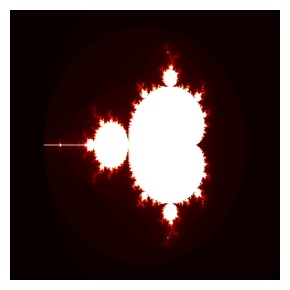

In [106]:
matrix = mandelbrot_2(x_steps=400, y_steps=400)

plt.figure(figsize=(3, 3))
plt.imshow(matrix, cmap="hot")
plt.axis("off")
plt.tight_layout()
plt.savefig("image.png")
plt.show()

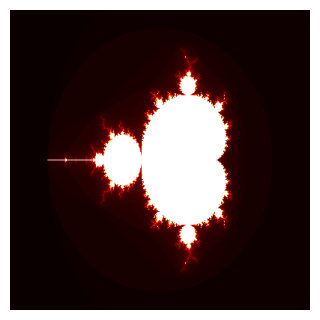

In [107]:
matrix = mandelbrot_2(x_steps=400, y_steps=400)

plt.figure(figsize=(3, 3))
plt.imshow(matrix, cmap="hot")
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig("image.png")
plt.show()